In [6]:

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [3]:
import numpy as np
import mahotas as mh

In [3]:
image, prob, gold, rhoana, bb = gp.Legacy.read_dojo_data()

a


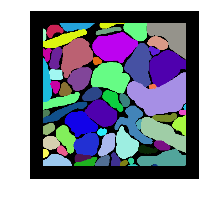

In [8]:
gp.Util.view(gold[0])

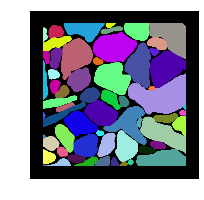

In [9]:
gp.Util.view(gold[1])

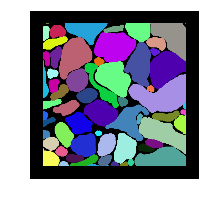

In [10]:
gp.Util.view(gold[2])

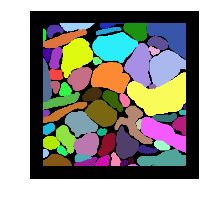

In [7]:
gp.Util.view(gold[0])

In [16]:
import h5py
import mahotas as mh
import numpy as np

In [13]:
#
# create gold h5 for neuroproof
#
all_labels = mh.fullhistogram(gold.astype(np.uint64))
all_labels = np.where(all_labels!=0)

transforms = np.zeros((all_labels[0].shape[0],2), dtype=np.uint64)
transforms[:,0] = all_labels[0]
transforms[:,1] = all_labels[0]

with h5py.File('/home/d/fp_data/gold.h5', 'w') as hf:
    hf.create_dataset('stack', data=gold)
    hf.create_dataset('transforms', data=transforms)

In [18]:
#
# create rhoana h5 for neuroproof
#
all_labels = mh.fullhistogram(rhoana.astype(np.uint64))
all_labels = np.where(all_labels!=0)

transforms = np.zeros((all_labels[0].shape[0],2), dtype=np.uint64)
transforms[:,0] = all_labels[0]
transforms[:,1] = all_labels[0]

with h5py.File('/home/d/FP/dojo/rhoana_relabeled.h5', 'w') as hf:
    hf.create_dataset('stack', data=rhoana)
    hf.create_dataset('transforms', data=transforms)

In [15]:
#
# create prob h5 for neuroproof
#
p1 = prob.copy()
# has to be x,y,z
p1 = p1.swapaxes(0,2)
p1 = p1.swapaxes(0,1)

p2 = p1.copy()
p2 = 255-p2
p_2channels = np.zeros((prob.shape[2],prob.shape[1],prob.shape[0],2), dtype=np.float32)
p_2channels[:,:,:,0] = p1 / 255.
p_2channels[:,:,:,1] = p2 / 255.
with h5py.File('/home/d/fp_data/prob.h5', 'w') as hf:
    hf.create_dataset('volume/predictions', data=p_2channels)

In [6]:
image.shape

(10, 474, 474)

In [7]:
for z in range(10):
    
    mh.imsave('/home/d/dojo_xp/data/dojo_data_vis2014/images/'+str(z)+'.png', image[z])